Iterations for convergence: 4


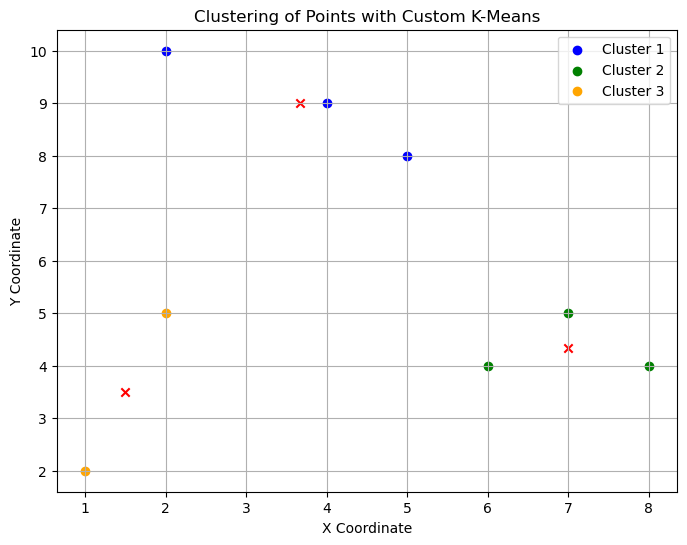

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#calculating euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Implementation of K-means algorithm
def k_means_with_iterations(points, centroids, max_iters=10):
    np.random.seed(42)
    k = len(centroids)

    for iteration in range(max_iters):
        # Step 2: Assign points to the nearest centroid
        clusters = [[] for _ in range(k)]
        for point in points:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(point)

        # Step 3: Update centroids
        new_centroids = np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else centroids[i] 
                                  for i, cluster in enumerate(clusters)])
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids, iteration + 1

# Sample data
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Predefined centroids
initial_centroids = np.array([[2, 10], [5, 8], [1, 2]])

# Perform K-Means clustering with iteration count
clusters, centroids, iterations = k_means_with_iterations(points, initial_centroids)

# Display the number of iterations for convergence
print("Iterations for convergence:", iterations)

# Plotting the results
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'orange']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[i][0], centroids[i][1], color='red', marker='x')

plt.title('Clustering of Points with Custom K-Means')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()
